<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
 
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
cleaned_df = df.drop("Unnamed: 32", axis=1)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
correlation_matrix = cleaned_df.corr().round(2)
correlation_matrix

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.00,0.07,0.10,0.07,0.10,-0.01,0.00,0.05,0.04,-0.02,...,0.08,0.06,0.08,0.11,0.01,-0.00,0.02,0.04,-0.04,-0.03
radius_mean,0.07,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.10,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.07,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.10,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,-0.01,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.00,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.05,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.04,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,-0.02,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [7]:
# Define X and y

columns = cleaned_df.columns
X = cleaned_df[[col for col in columns if col != 'id' and col != 'diagnosis']]
y = cleaned_df['diagnosis']
y.replace('B', 0, inplace=True)
y.replace('M', 1, inplace=True)

In [8]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### 4. What is the baseline accuracy?

In [9]:
# ANSWER
1 - y.mean()

0.6274165202108963

In [10]:
y.mean()

0.37258347978910367

### 5. Choose features to be your predictor variables and set up your X.

In [11]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [12]:
# Make an instance of a KNeighborsClassifier object with 1 neighbor

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [13]:
# predict the response values for the observations in X ("test the model")

# store the predicted response values

knn.score(X_test, y_test)

1.0

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [14]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# STEP 2: train the model on the training set (using K=1)
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# STEP 3: test the model on the testing set, and check the accuracy
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.score(X_test, y_test)

1.0

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [16]:
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn = neighbors.KNeighborsClassifier(n_neighbors=len(X_train))
# Fit Train Data
knn.fit(X_train, y_train)
# Print accuracy_score
knn.score(X_test, y_test)

0.6228070175438597

In [17]:
1 - y.mean()

0.6274165202108963

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [18]:
# create lists 

num_neighbors = []    
test_accuracies = []

# plot test accuracy by number of neighbors:

start = 1
stop = len(X_train)+1

for k in range(start, stop):
    
    # instantiate model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # fit and score
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    
    #append to list
    num_neighbors.append(k)
    test_accuracies.append(score)

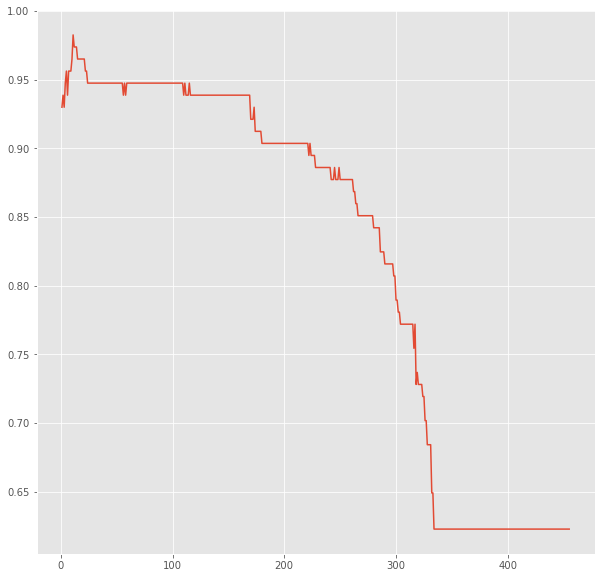

In [19]:
plt.figure(figsize=(10,10))
plt.plot(num_neighbors, test_accuracies);


### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [20]:
from sklearn.model_selection import cross_val_score

num_neighbors = []    
test_accuracies = []

# plot test accuracy by number of neighbors:

start = 1
stop = 350

for k in range(start, stop):
    
    # instantiate model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # score
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
    score = sum(scores)/ len(scores)
    
    #append to list
    num_neighbors.append(k)
    test_accuracies.append(score)

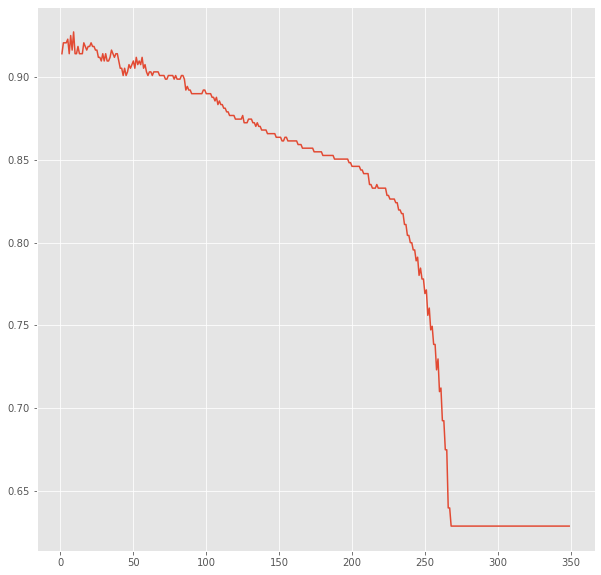

In [21]:
plt.figure(figsize=(10,10))
plt.plot(num_neighbors, test_accuracies);

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [22]:
# Standarize X
scaler = StandardScaler()
scaled = scaler.fit_transform(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [24]:
# plot test accuracy by number of neighbors:

from sklearn.model_selection import cross_val_score

num_neighbors = []    
test_accuracies = []

# plot test accuracy by number of neighbors:

start = 1
stop = 350

for k in range(start, stop):
    
    # instantiate model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # score
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
    score = sum(scores)/ len(scores)
    
    #append to list
    num_neighbors.append(k)
    test_accuracies.append(score)

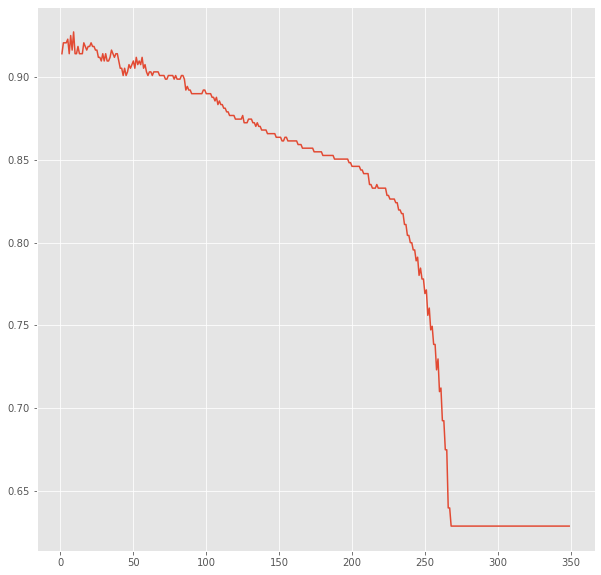

In [25]:
plt.figure(figsize=(10,10))
plt.plot(num_neighbors, test_accuracies);

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



